In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
# 定数
a = 0
b = 0.5
c = -0.5
d = 0

# 初期値
R0 = 1
J0 = 10

# シミュレーションの実行時間
T = 20

# 初期値の配列
initial_conditions = np.array([[0.5, 1], [1, 0.5], [-0.5, 1], [0.5, -1]])
dt = 1e-2
steps = int(T / dt) + 1

In [109]:
# 微分された関数
def dx(x, y):
    return a*x + b*y

def dy(x, y):
    return c*x + d*y


# 解析解をオイラー法で求める関数
def euler(dx, dy, R0, J0, dt, steps):
    """
    連立微分方程式を解く関数

    Prameters:
        dx (function): dR/dtを計算する関数
        dy (function): dJ/dtを計算する関数
        R0, J0 (float): 初期条件
        dt (float): 時間ステップ
        steps (int): 計算ステップ数

    Returns:
        R (list): 時間経過に伴うRの値のリスト
        J (list): 時間経過に伴うJの値のリスト
    """

    R_array = np.zeros(steps)
    J_array = np.zeros(steps)
    R_array[0] = R0
    J_array[0] = J0

    for i in range(1, steps):
        dR_dt = dx(R_array[i-1], J_array[i-1])
        dJ_dt = dy(R_array[i-1], J_array[i-1])
        R_array[i] = R_array[i-1] + dR_dt * dt
        J_array[i] = J_array[i-1] + dJ_dt * dt

    return R_array, J_array


# 解軌道を描画
def plot_trajectory(R0, J0):
    t = np.linspace(-2, T, steps)
    
    # 複数の解軌道を描画
    R, J = euler(dx, dy, R0, J0, dt, steps)
    plt.plot(t, R)
    plt.plot(t, J)
    
    plt.show()

# 解析解のペアをプロット
def plot_trajectory_pair(R0, J0):
    
    # 初期値による解析解を求める
    R, J = euler(dx, dy, R0, J0, dt, steps)

    plt.plot(R0, J0, marker='o')
    plt.plot(R, J)
    
    plt.show() 

# ベクトル場を描画
def plot_vector_field(dR: dx, dJ: dy, R, J):
    dR = dx(R, J)
    dJ = dy(R, J)
    




[ 1.          1.05        1.099975   ... -6.35663351 -6.3971817
 -6.43757097]
[10.          9.995       9.98975    ... -8.10963723 -8.07785407
 -8.04586816]


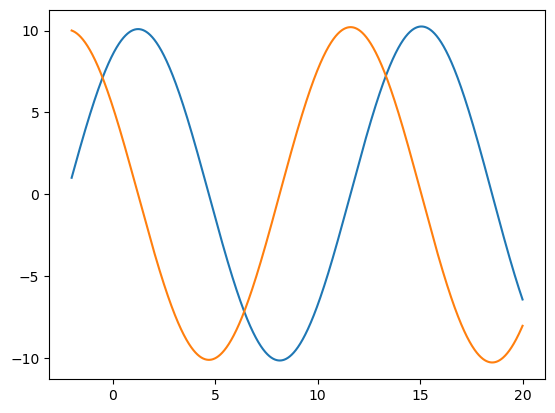

In [110]:
R_result, J_result = euler(dx, dy, R0, J0, dt, steps)
print(R_result)
print(J_result)
plot_trajectory(R0, J0)

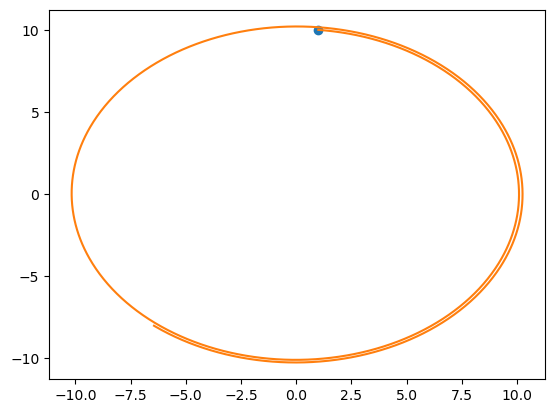

In [111]:
plot_trajectory_pair(R0, J0)

In [100]:
import numpy as np

array = np.array([])
# arrayに要素を追加
array = np.append(array, 1)
array = np.append(array, 2)

# 追加後の配列を確認
print("追加後の配列:", array)



追加後の配列: [1. 2.]


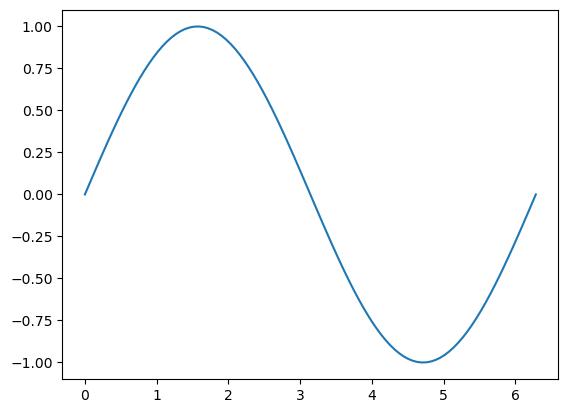

In [101]:
x = np.linspace(0, np.pi*2, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()